**REGRESSÃO LOGÍSTICA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("..\\datasets\\advertising.csv")

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<AxesSubplot:xlabel='Clicked on Ad', ylabel='Count'>

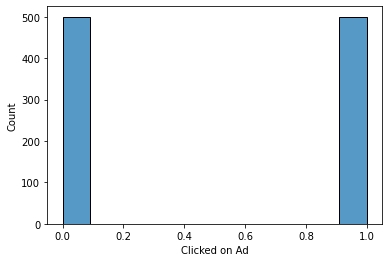

In [5]:
sns.histplot(df, x="Clicked on Ad")

In [6]:
# Número de pessoas que clicaram ou não clicaram
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [7]:
df["Clicked on Ad"].value_counts(normalize=True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

In [8]:
df_model = df.select_dtypes(include = np.number)

In [9]:
df_model

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [10]:
x = df_model.drop(columns="Clicked on Ad")
y = df_model["Clicked on Ad"]

In [11]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [13]:
# 1) Importar o estimador
from sklearn.linear_model import LogisticRegression

In [14]:
# 2) Instanciar o estimador (hiperparametros!)
# Modelo baseline escolhemos os hiperparametros default
lr = LogisticRegression()

In [15]:
# 3) train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# 4) treino com .fit, dados de treino
lr.fit(x_train, y_train)

LogisticRegression()

MODELO TREINADO!!

In [17]:
lr.intercept_

array([0.00549774])

In [18]:
lr.coef_

array([[-5.61839608e-02,  2.65933604e-01, -1.62153396e-05,
        -2.74019904e-02,  2.26459439e-03]])

In [19]:
y_pred = lr.predict(x_test)

In [20]:
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [21]:
y_test[:10].values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

RESULTADO USANDO A PROBABILIDADE

In [22]:
lr_proba = lr.predict_proba(x_test)*100

In [23]:
lr_proba[:10]

array([[50.58997471, 49.41002529],
       [ 0.30197107, 99.69802893],
       [ 4.95289102, 95.04710898],
       [ 1.00266761, 98.99733239],
       [97.0050585 ,  2.9949415 ],
       [71.53512358, 28.46487642],
       [97.66498343,  2.33501657],
       [ 0.92128037, 99.07871963],
       [69.13994919, 30.86005081],
       [ 5.18626496, 94.81373504]])

In [24]:
y_proba_1 = lr_proba[:, 1]
y_proba_1

array([49.41002529, 99.69802893, 95.04710898, 98.99733239,  2.9949415 ,
       28.46487642,  2.33501657, 99.07871963, 30.86005081, 94.81373504,
        1.91973459, 90.90921247, 99.72759974,  2.42941879, 91.83723022,
       99.37097871, 99.88221381, 96.75141551,  9.27475849, 99.03039205,
        9.26845067, 98.67275287, 99.40917664,  1.50985558,  2.00769811,
       99.54274407,  0.86869382,  1.49337933, 99.08453777, 73.08672776,
        1.73430636, 66.91162618,  3.5847581 , 85.73595019, 99.78880028,
        7.09488697,  2.46164259, 11.13378215, 86.52381835, 97.95995885,
        1.43751539, 91.89211519,  2.39115237, 98.40065377,  1.24847499,
       10.08665685, 99.23479089, 99.84548612,  2.3674479 , 99.69297911,
       98.05286826,  0.83781385, 88.39461249,  1.23104561, 11.15746918,
        6.68504894, 13.62737796, 99.81228148,  2.49385435, 96.12083562,
        7.74709601, 99.11410561, 10.87286091, 97.16179222, 87.78192233,
       97.44674843, 99.85446743,  6.35051496, 70.50712703, 95.10

In [25]:
y_proba_0 = lr_proba[:, 0]
y_proba_0

array([5.05899747e+01, 3.01971071e-01, 4.95289102e+00, 1.00266761e+00,
       9.70050585e+01, 7.15351236e+01, 9.76649834e+01, 9.21280366e-01,
       6.91399492e+01, 5.18626496e+00, 9.80802654e+01, 9.09078753e+00,
       2.72400259e-01, 9.75705812e+01, 8.16276978e+00, 6.29021287e-01,
       1.17786190e-01, 3.24858449e+00, 9.07252415e+01, 9.69607953e-01,
       9.07315493e+01, 1.32724713e+00, 5.90823355e-01, 9.84901444e+01,
       9.79923019e+01, 4.57255934e-01, 9.91313062e+01, 9.85066207e+01,
       9.15462235e-01, 2.69132722e+01, 9.82656936e+01, 3.30883738e+01,
       9.64152419e+01, 1.42640498e+01, 2.11199720e-01, 9.29051130e+01,
       9.75383574e+01, 8.88662178e+01, 1.34761816e+01, 2.04004115e+00,
       9.85624846e+01, 8.10788481e+00, 9.76088476e+01, 1.59934623e+00,
       9.87515250e+01, 8.99133432e+01, 7.65209110e-01, 1.54513882e-01,
       9.76325521e+01, 3.07020894e-01, 1.94713174e+00, 9.91621862e+01,
       1.16053875e+01, 9.87689544e+01, 8.88425308e+01, 9.33149511e+01,
      

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=500>

In [ ]:
AVALIANDO O MODELO

In [26]:
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, y_pred)

array([[140,   6],
       [ 25, 129]], dtype=int64)

In [30]:
from sklearn.metrics import plot_confusion_matrix

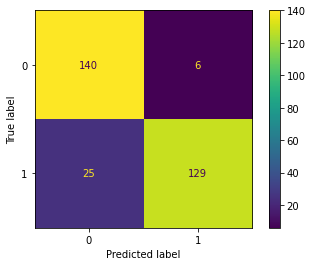

In [31]:
plot_confusion_matrix(lr, x_test, y_test, cmap="viridis");

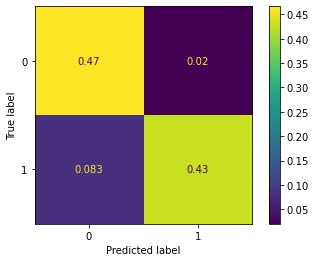

In [32]:
plot_confusion_matrix(lr, x_test, y_test, normalize='all'); # 'true', 'pred', 'all'

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [34]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, pos_label=1) # classe 1

0.9555555555555556

In [35]:
precision_score(y_test, y_pred, pos_label=0)  # classe 0

0.8484848484848485

In [36]:
lr.classes_

array([0, 1], dtype=int64)

In [37]:
probas = lr.predict_proba(x_test)

In [38]:
probas_0 = probas[:,0]
probas_1 = probas[:,1]

In [40]:
cutoff = 0.5

y_pred_proba = np.where(probas_1 >= cutoff, 1, 0) # Operador binário. Posso trocar o 1 pelo 0 caso for necessário

In [41]:
pd.Series(y_pred_proba).value_counts()

0    165
1    135
dtype: int64

In [42]:
cutoff = 0.9

y_pred_proba = np.where(probas_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

0    202
1     98
dtype: int64

In [43]:
cutoff = 0.1

y_pred_proba = np.where(probas_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

1    182
0    118
dtype: int64

In [44]:
cutoff = 0.05

y_pred_proba = np.where(probas_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

1    217
0     83
dtype: int64

Coeficientes:
 [[-5.61839608e-02  2.65933604e-01 -1.62153396e-05 -2.74019904e-02
   2.26459439e-03]]

Intercept: [0.00549774]

Classes: [0 1]

###################################################

Avaliação de modelos com diferentes valores de cutoff

###################################################


 Cutoff: 0.05

Matriz de confusão do modelo nos dados de teste:
[[ 78  68]
 [  5 149]]


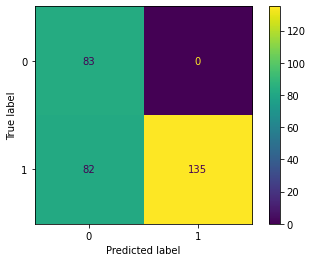


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.94      0.53      0.68       146
           1       0.69      0.97      0.80       154

    accuracy                           0.76       300
   macro avg       0.81      0.75      0.74       300
weighted avg       0.81      0.76      0.74       300


##########################################################


 Cutoff: 0.1

Matriz de confusão do modelo nos dados de teste:
[[111  35]
 [  7 147]]


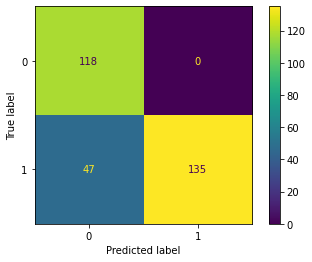


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       146
           1       0.81      0.95      0.88       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300


##########################################################


 Cutoff: 0.2

Matriz de confusão do modelo nos dados de teste:
[[127  19]
 [ 13 141]]


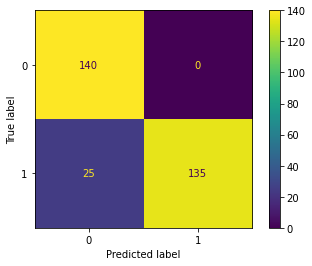


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       146
           1       0.88      0.92      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################


 Cutoff: 0.3

Matriz de confusão do modelo nos dados de teste:
[[133  13]
 [ 17 137]]


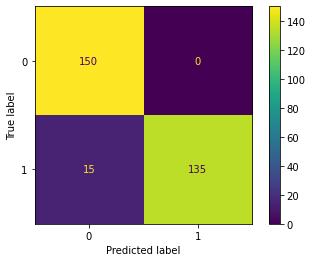


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.91      0.89      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


##########################################################


 Cutoff: 0.4

Matriz de confusão do modelo nos dados de teste:
[[136  10]
 [ 23 131]]


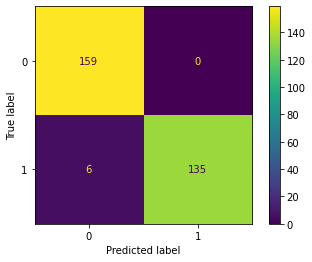


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.93      0.85      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################


 Cutoff: 0.5

Matriz de confusão do modelo nos dados de teste:
[[140   6]
 [ 25 129]]


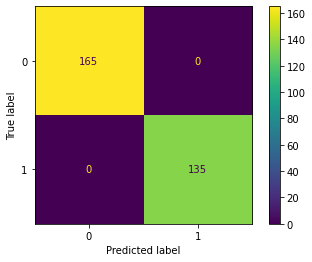


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


##########################################################


 Cutoff: 0.6

Matriz de confusão do modelo nos dados de teste:
[[141   5]
 [ 34 120]]


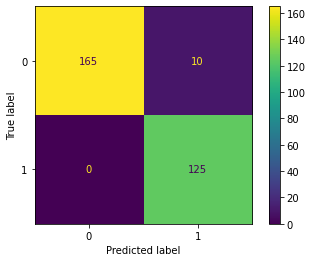


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       146
           1       0.96      0.78      0.86       154

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


##########################################################


 Cutoff: 0.7

Matriz de confusão do modelo nos dados de teste:
[[144   2]
 [ 38 116]]


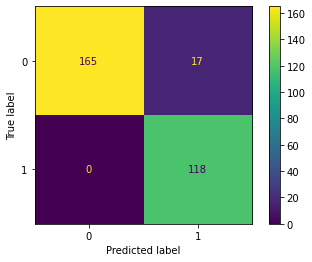


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       146
           1       0.98      0.75      0.85       154

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.87      0.87       300


##########################################################


 Cutoff: 0.8

Matriz de confusão do modelo nos dados de teste:
[[144   2]
 [ 42 112]]


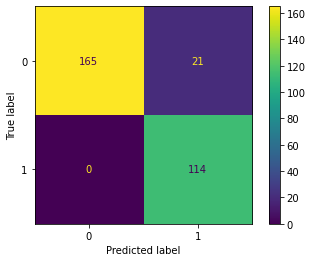


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.85       300
   macro avg       0.88      0.86      0.85       300
weighted avg       0.88      0.85      0.85       300


##########################################################


 Cutoff: 0.9

Matriz de confusão do modelo nos dados de teste:
[[145   1]
 [ 57  97]]


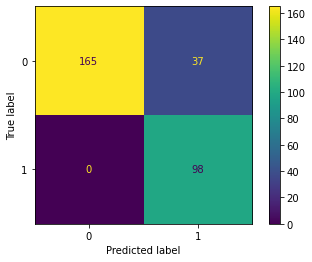


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       146
           1       0.99      0.63      0.77       154

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.86      0.81      0.80       300


##########################################################


 Cutoff: 0.95

Matriz de confusão do modelo nos dados de teste:
[[146   0]
 [ 70  84]]


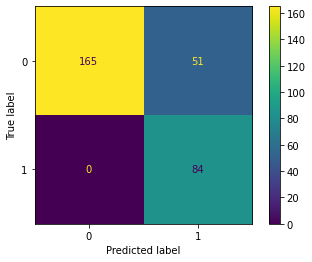


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.55      0.71       154

    accuracy                           0.77       300
   macro avg       0.84      0.77      0.76       300
weighted avg       0.84      0.77      0.75       300


##########################################################



In [45]:
# leia a base
df = pd.read_csv("..\\datasets\\advertising.csv")

# apenas as features numericas
df = df.select_dtypes(include=[np.number])

# separe as features e o target
X = df.drop(columns = 'Clicked on Ad')
y = df['Clicked on Ad']

# 1) importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# 2) instancie a classe
estimador = LogisticRegression()

# 3) faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# 4) treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
classes =  modelo.classes_
print("\nClasses:", classes)

# 5) probabilidades das previsões
probs = modelo.predict_proba(X_test)

# probabilidade de pertencimento à classe 1
probs_1 = probs[:, 1]

# avaliação  do modelo
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# cutoffs
threshold_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

print("\n###################################################\n")
print("Avaliação de modelos com diferentes valores de cutoff")
print("\n###################################################\n")

for threshold in threshold_list:
    
    print("\n Cutoff:", threshold)
    
    # previsões
    y_pred = np.where(probs_1 >= threshold, 1, 0)

    print("\nMatriz de confusão do modelo nos dados de teste:")
    print(confusion_matrix(y_test, y_pred))
    
    print(plot_confusion_matrix(estimador, x_test, y_pred, cmap="viridis"))
    plt.show()

    print("\nClassification report do modelo nos dados de teste:")
    print(classification_report(y_test, y_pred))
    
    print("\n##########################################################\n")

In [46]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

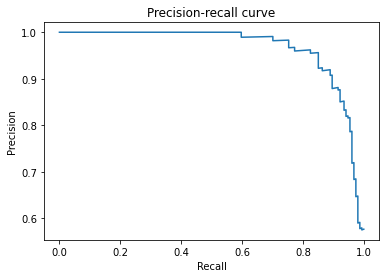

In [47]:
plt.title("Precision-recall curve")

plt.plot(recalls, precisions)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.show()

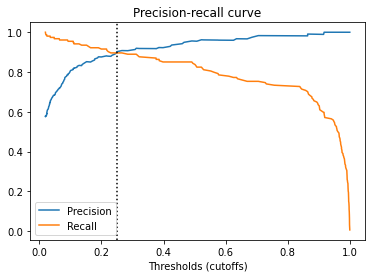

In [48]:
plt.title("Precision-recall curve")

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")

plt.xlabel("Thresholds (cutoffs)")

ponto_de_encontro = thresholds[np.where(precisions == recalls)]
plt.axvline(x=ponto_de_encontro, ls=":", color="black")

# # generalização: se nãoi tiver igualdade, testamos aproximação
# tol = 1e-4
# ponto_de_encontro = thresholds[np.where(np.abs(precisions - recalls) < tol)]
# plt.axvline(x=ponto_de_encontro, ls=":", color="black")

plt.legend()
plt.show()

In [49]:
ponto_de_encontro

array([0.24880951])


 Cutoff: [0.24880951]

Matriz de confusão do modelo nos dados de teste:
[[130  16]
 [ 16 138]]


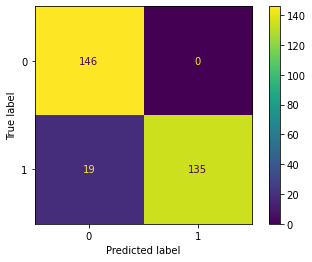


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       146
           1       0.90      0.90      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################



In [50]:
threshold = ponto_de_encontro

print("\n Cutoff:", threshold)

# previsões
y_pred = np.where(probs_1 >= threshold, 1, 0)

print("\nMatriz de confusão do modelo nos dados de teste:")
print(confusion_matrix(y_test, y_pred))

print(plot_confusion_matrix(estimador, x_test, y_pred, cmap="viridis"))
plt.show()

print("\nClassification report do modelo nos dados de teste:")
print(classification_report(y_test, y_pred))

print("\n##########################################################\n")

In [51]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.8904109589041096,
  'recall': 0.8904109589041096,
  'f1-score': 0.8904109589041096,
  'support': 146},
 '1': {'precision': 0.8961038961038961,
  'recall': 0.8961038961038961,
  'f1-score': 0.8961038961038962,
  'support': 154},
 'accuracy': 0.8933333333333333,
 'macro avg': {'precision': 0.8932574275040028,
  'recall': 0.8932574275040028,
  'f1-score': 0.8932574275040028,
  'support': 300},
 'weighted avg': {'precision': 0.8933333333333333,
  'recall': 0.8933333333333333,
  'f1-score': 0.8933333333333333,
  'support': 300}}

In [52]:
y_proba_1

array([0.49410025, 0.99698029, 0.95047109, 0.98997332, 0.02994942,
       0.28464876, 0.02335017, 0.9907872 , 0.30860051, 0.94813735,
       0.01919735, 0.90909212, 0.997276  , 0.02429419, 0.9183723 ,
       0.99370979, 0.99882214, 0.96751416, 0.09274758, 0.99030392,
       0.09268451, 0.98672753, 0.99409177, 0.01509856, 0.02007698,
       0.99542744, 0.00868694, 0.01493379, 0.99084538, 0.73086728,
       0.01734306, 0.66911626, 0.03584758, 0.8573595 , 0.997888  ,
       0.07094887, 0.02461643, 0.11133782, 0.86523818, 0.97959959,
       0.01437515, 0.91892115, 0.02391152, 0.98400654, 0.01248475,
       0.10086657, 0.99234791, 0.99845486, 0.02367448, 0.99692979,
       0.98052868, 0.00837814, 0.88394612, 0.01231046, 0.11157469,
       0.06685049, 0.13627378, 0.99812281, 0.02493854, 0.96120836,
       0.07747096, 0.99114106, 0.10872861, 0.97161792, 0.87781922,
       0.97446748, 0.99854467, 0.06350515, 0.70507127, 0.95100256,
       0.97279199, 0.50131127, 0.1279694 , 0.0508204 , 0.84115

CURVA ROC

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_1)

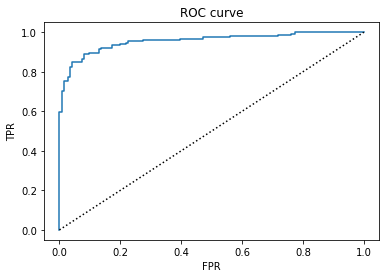

In [54]:
plt.title("ROC curve")

plt.plot(fpr, tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")

x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")

plt.show()

Por fim, pra calcular o AUC-ROC:

In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_1)

0.9559242127735279